# AD3: conexión con la API del COVID-19 y análisis con Pandas

Me conecto a la API https://api.covid19api.com/

## Instalación e importación de Pandas

In [1]:
!pip install pandas

In [2]:
import pandas as pd

## Variables/objetos

Variable de nombre `url` para llamar a la lista de diccionarios de países de la API del Covid-19. Posteriormente invoco la url para saber si ha funcionado la llamada.

In [3]:
url = 'https://api.covid19api.com/countries'

In [4]:
url

'https://api.covid19api.com/countries'

Añado una variable para la función `pd.read_json` para la variable anterior.

Se podría hacer:

`df = pd.read_json(https://api.covid19api.com/countries`

Se hace a través de variable para facilitar su uso posterior con código más breve.

Posteriormente invoco el datajson para ver si ha funcionado la importación, lo que muestra una tabla en la que hay 248 elementos. En este caso empieza a contar en 0 por tratarse de json. 

Este código nos muestra un estracto con las filas del inicio y las del final.

In [5]:
df = pd.read_json(url)

In [6]:
df

,Country,Slug,ISO2
0,Gibraltar,gibraltar,GI
1,Oman,oman,OM
2,France,france,FR
3,Jersey,jersey,JE
4,Mali,mali,ML
...,...,...,...
243,Puerto Rico,puerto-rico,PR
244,Papua New Guinea,papua-new-guinea,PG
245,Saint Pierre and Miquelon,saint-pierre-and-miquelon,PM
246,Timor-Leste,timor-leste,TL


Para visualizar los datos de España, dado que tengo una columna de países, creo una lista nueva que seleccione solo los identificadores similares a `Spain`.

In [7]:
df[df['Country'] == 'Spain']

,Country,Slug,ISO2
141,Spain,spain,ES


Defino otra variable con los datos en tiempo real de España.
(¡ATENCIÓN! la nomenclatura con guion bajo, ya que el guion medio no debe emplearse para código de este tipo).

Creo el objeto `df_rt_es` para que lea la información de la url previa.

Posteriormente muestro los datos para ver que ha funcionado correctamente.

In [8]:
url_rt_es = 'https://api.covid19api.com/country/spain/status/confirmed/live'
df_rt_es = pd.read_json(url_rt_es)
df_rt_es

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
891,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-01 00:00:00+00:00
892,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-02 00:00:00+00:00
893,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-03 00:00:00+00:00
894,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-04 00:00:00+00:00


Marco `df_rt_es.tail()` para ver la cola de la tabla.

In [9]:
df_rt_es.tail()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
891,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-01 00:00:00+00:00
892,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-02 00:00:00+00:00
893,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-03 00:00:00+00:00
894,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-04 00:00:00+00:00
895,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-05 00:00:00+00:00


Marco `df_rt_es.head()` para ver la parte inicial.

In [10]:
df_rt_es.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00


Tenemos una tabla con columnas para ID, país, código de país, provincia, ciudad, código de ciudad, latitud, longitud, número de casos, estado y la fecha. Si quiero obtener una gráfica con el número de casos y la fecha lo que debo hacer es transformar la columna de control. Para ello convierto la columna de fecha en columna de control pidiéndole ya que me muestre los casos España desde el 20 de enero de 2020 a la actualidad con la expresión `df_rt_es.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en España desde 20/01/2020 hasta 29/06/2022")` a la que debo darle un nombre de variable si no quiero tener problemas con la configuración de Anaconda3. Le ponto de nombre `plot_rt_es`.

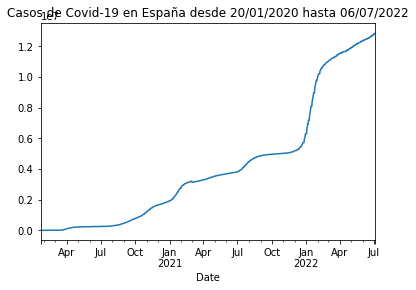

In [12]:
plot_rt_es = df_rt_es.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en España desde 20/01/2020 hasta 06/07/2022")

## Repetir el proceso para Panamá
Llevo a cabo el mismo código de variables, pero para la URL de Panamá.

In [13]:
df[df['Country'] == 'Panama']

,Country,Slug,ISO2
190,Panama,panama,PA


In [14]:
url_rt_pa = 'https://api.covid19api.com/country/panama/status/confirmed/live'

In [15]:
url_rt_pa

'https://api.covid19api.com/country/panama/status/confirmed/live'

In [16]:
df_rt_pa = pd.read_json(url_rt_pa)

In [17]:
df_rt_pa

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-22 00:00:00+00:00
1,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-23 00:00:00+00:00
2,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-24 00:00:00+00:00
3,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-25 00:00:00+00:00
4,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
892,Panama,PA,,,,8.54,-80.78,922990,confirmed,2022-07-02 00:00:00+00:00
893,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-03 00:00:00+00:00
894,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-04 00:00:00+00:00
895,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-05 00:00:00+00:00


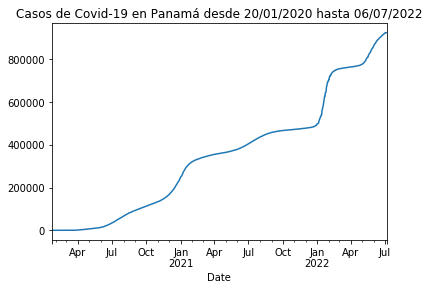

In [18]:
plot_rt_pa = df_rt_pa.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en Panamá desde 20/01/2020 hasta 06/07/2022")

Añadiendo `,kind="area"` al final se pondría el gráfico de área y con `,kind="bar"` el gráfico de barras, aunque este formato no es lógico para este tipo de datos como puede visualizarse en el segundo ejemplo.

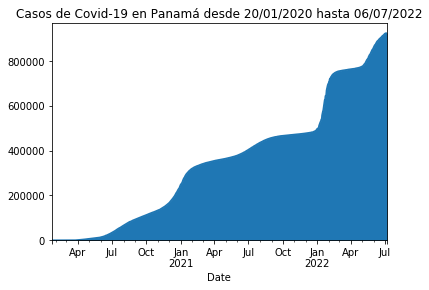

In [19]:
plot_rt_pa = df_rt_pa.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en Panamá desde 20/01/2020 hasta 06/07/2022",kind="area")

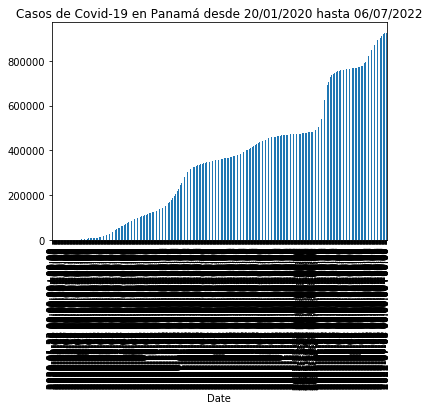

In [20]:
plot_rt_pa = df_rt_pa.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en Panamá desde 20/01/2020 hasta 06/07/2022",kind="bar")

## Ploteamos dos países

Para *plotear* dos o más paises hay que seguir los siguientes pasos:

Volvemos a identificar las variables previas de lectura de Json de las dos URLs para no tener que repetir el proceso desde arriba al cerrar el documento.

In [21]:
df_rt_pa = pd.read_json(url_rt_pa)
df_rt_es = pd.read_json(url_rt_es)

Se separan los casos por fecha en cada uno de los países y se plotea para visualizar la gráfica.

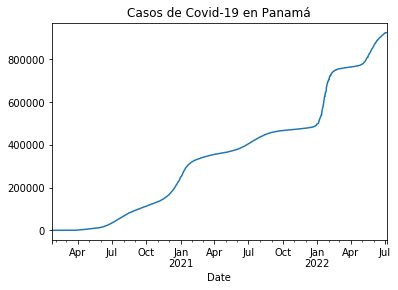

In [22]:
casos_pa = df_rt_pa.set_index('Date')['Cases']
casos_pa.plot(title="Casos de Covid-19 en Panamá")

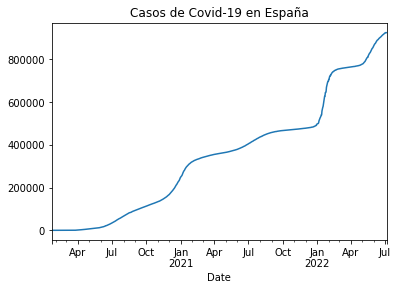

In [23]:
casos_es = df_rt_es.set_index('Date')['Cases']
casos_pa.plot(title="Casos de Covid-19 en España")

Para visualizar podemos concatenar ambas tablas por fechas y casos en ambos países.

In [24]:
pa_vs_es = pd.concat([casos_es,casos_pa],axis=1)
pa_vs_es

,Cases,Cases
Date,,
2020-01-22 00:00:00+00:00,0.0,0
2020-01-23 00:00:00+00:00,0.0,0
2020-01-24 00:00:00+00:00,0.0,0
2020-01-25 00:00:00+00:00,0.0,0
2020-01-26 00:00:00+00:00,0.0,0
...,...,...
2022-07-02 00:00:00+00:00,12818184.0,922990
2022-07-03 00:00:00+00:00,12818184.0,925254
2022-07-04 00:00:00+00:00,12818184.0,925254


Para identificar los países marcamos las columnas con el nombre del país y visualizamos la gráfica con los datos nombrados.

In [25]:
pa_vs_es.columns= ['España','Panamá']
pa_vs_es

,España,Panamá
Date,,
2020-01-22 00:00:00+00:00,0.0,0
2020-01-23 00:00:00+00:00,0.0,0
2020-01-24 00:00:00+00:00,0.0,0
2020-01-25 00:00:00+00:00,0.0,0
2020-01-26 00:00:00+00:00,0.0,0
...,...,...
2022-07-02 00:00:00+00:00,12818184.0,922990
2022-07-03 00:00:00+00:00,12818184.0,925254
2022-07-04 00:00:00+00:00,12818184.0,925254


Posteriormente a esta concatenación le hacemos un *ploteo* para visualizar la comparativa de forma visual.

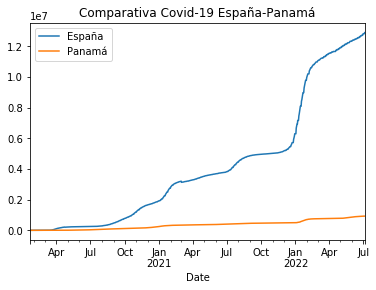

In [26]:
pa_vs_es.plot(title="Comparativa Covid-19 España-Panamá")

Si nos queremos descargar los datos en CSV podemos hacerlo con la función: `pa_vs_es.to_csv('pa_vs_cr.csv')` siendo `pa_vs_cr` el nombre de la tabla comparativa.

In [27]:
pa_vs_es.to_csv('pa_vs_cr.csv')
%ls

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 0699-4041

 Directorio de C:\Users\RNASA\IriaSantos-web

06/07/2022  12:59    <DIR>          .
06/07/2022  12:59    <DIR>          ..
30/06/2022  19:23    <DIR>          .ipynb_checkpoints
17/06/2022  22:31             6.774 ad1.md
22/06/2022  01:20             4.455 ad2.md
28/06/2022  01:08            93.323 ad3.ipynb
28/06/2022  01:11            75.389 ad3.md
27/06/2022  00:56            19.134 ad3_2.ipynb
27/06/2022  01:00            12.909 ad3_2.md
06/07/2022  12:59           477.300 api-covid-pandas.ipynb
06/07/2022  12:52            60.070 api-covid-pandas.md
06/07/2022  12:51            76.963 casos_pa_cr_ni_gt_sv_hn.svg
06/07/2022  12:52            13.901 output_22_0.png
06/07/2022  12:52            14.409 output_29_0.png
06/07/2022  12:52            13.425 output_31_0.png
06/07/2022  12:52            22.614 output_32_0.png
06/07/2022  12:52            12.117 output_38_1.png
06/07/2022  12:52            1

Para exportar una gráfica determinada en PNG o SVG seguiríamos los siguientes códigos:

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 0699-4041

 Directorio de C:\Users\RNASA\IriaSantos-web

06/07/2022  12:59    <DIR>          .
06/07/2022  12:59    <DIR>          ..
30/06/2022  19:23    <DIR>          .ipynb_checkpoints
17/06/2022  22:31             6.774 ad1.md
22/06/2022  01:20             4.455 ad2.md
28/06/2022  01:08            93.323 ad3.ipynb
28/06/2022  01:11            75.389 ad3.md
27/06/2022  00:56            19.134 ad3_2.ipynb
27/06/2022  01:00            12.909 ad3_2.md
06/07/2022  12:59           477.300 api-covid-pandas.ipynb
06/07/2022  12:52            60.070 api-covid-pandas.md
06/07/2022  12:51            76.963 casos_pa_cr_ni_gt_sv_hn.svg
06/07/2022  12:52            13.901 output_22_0.png
06/07/2022  12:52            14.409 output_29_0.png
06/07/2022  12:52            13.425 output_31_0.png
06/07/2022  12:52            22.614 output_32_0.png
06/07/2022  12:52            12.117 output_38_1.png
06/07/2022  12:52            1

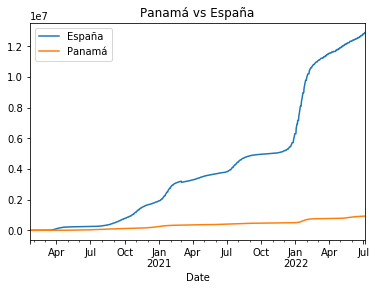

In [28]:
import matplotlib.pyplot as plt
pa_vs_es.plot(title="Panamá vs España")
plt.savefig('pa_vs_es.png')
%ls

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 0699-4041

 Directorio de C:\Users\RNASA\IriaSantos-web

06/07/2022  12:59    <DIR>          .
06/07/2022  12:59    <DIR>          ..
30/06/2022  19:23    <DIR>          .ipynb_checkpoints
17/06/2022  22:31             6.774 ad1.md
22/06/2022  01:20             4.455 ad2.md
28/06/2022  01:08            93.323 ad3.ipynb
28/06/2022  01:11            75.389 ad3.md
27/06/2022  00:56            19.134 ad3_2.ipynb
27/06/2022  01:00            12.909 ad3_2.md
06/07/2022  12:59           477.300 api-covid-pandas.ipynb
06/07/2022  12:52            60.070 api-covid-pandas.md
06/07/2022  12:51            76.963 casos_pa_cr_ni_gt_sv_hn.svg
06/07/2022  12:52            13.901 output_22_0.png
06/07/2022  12:52            14.409 output_29_0.png
06/07/2022  12:52            13.425 output_31_0.png
06/07/2022  12:52            22.614 output_32_0.png
06/07/2022  12:52            12.117 output_38_1.png
06/07/2022  12:52            1

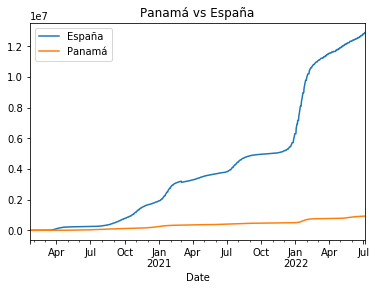

In [29]:
pa_vs_es.plot(title="Panamá vs España")
plt.savefig("pa_vs_es.svg", format="svg")
%ls

Con el programa de acceso libre Inkscape podemos realizar modificaciones en las gráficas en formato SVG (formato vectorial para la web).

## Repetimos para lograr una comparativa de Centroamérica

El listado de países es:
- Panamá
- Costa Rica
- Nicaragua
- Guatemala
- El Salvador
- Honduras

Verifico cual es el `slug` y el `ISO2` para emplear en la URL y en el identificador posteriormente (en todos los países).

In [30]:
df[df['Country'] == 'Panama']

,Country,Slug,ISO2
190,Panama,panama,PA


In [31]:
df[df['Country'] == 'Costa Rica']

,Country,Slug,ISO2
242,Costa Rica,costa-rica,CR


In [32]:
df[df['Country'] == 'Nicaragua']

,Country,Slug,ISO2
36,Nicaragua,nicaragua,NI


In [33]:
df[df['Country'] == 'Guatemala']

,Country,Slug,ISO2
239,Guatemala,guatemala,GT


In [34]:
df[df['Country'] == 'El Salvador']

,Country,Slug,ISO2
139,El Salvador,el-salvador,SV


In [35]:
df[df['Country'] == 'Honduras']

,Country,Slug,ISO2
91,Honduras,honduras,HN


Defino la variable con la URL de cada país y hago una llamada a Json para esas URLs en busca de las tablas de datos.

In [36]:
url_rt_pa = 'https://api.covid19api.com/country/panama/status/confirmed/live'
df_rt_pa = pd.read_json(url_rt_pa)
df_rt_pa

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-22 00:00:00+00:00
1,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-23 00:00:00+00:00
2,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-24 00:00:00+00:00
3,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-25 00:00:00+00:00
4,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
892,Panama,PA,,,,8.54,-80.78,922990,confirmed,2022-07-02 00:00:00+00:00
893,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-03 00:00:00+00:00
894,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-04 00:00:00+00:00
895,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-05 00:00:00+00:00


In [37]:
url_rt_cr = 'https://api.covid19api.com/country/costa-rica/status/confirmed/live'
df_rt_cr = pd.read_json(url_rt_cr)
df_rt_cr

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
892,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-02 00:00:00+00:00
893,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-03 00:00:00+00:00
894,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-04 00:00:00+00:00
895,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-05 00:00:00+00:00


In [38]:
url_rt_ni = 'https://api.covid19api.com/country/nicaragua/status/confirmed/live'
df_rt_ni = pd.read_json(url_rt_ni)
df_rt_ni

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-22 00:00:00+00:00
1,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-23 00:00:00+00:00
2,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-24 00:00:00+00:00
3,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-25 00:00:00+00:00
4,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
892,Nicaragua,NI,,,,12.87,-85.21,14690,confirmed,2022-07-02 00:00:00+00:00
893,Nicaragua,NI,,,,12.87,-85.21,14690,confirmed,2022-07-03 00:00:00+00:00
894,Nicaragua,NI,,,,12.87,-85.21,14690,confirmed,2022-07-04 00:00:00+00:00
895,Nicaragua,NI,,,,12.87,-85.21,14690,confirmed,2022-07-05 00:00:00+00:00


In [39]:
url_rt_gt = 'https://api.covid19api.com/country/guatemala/status/confirmed/live'
df_rt_gt = pd.read_json(url_rt_gt)
df_rt_gt

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-22 00:00:00+00:00
1,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-23 00:00:00+00:00
2,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-24 00:00:00+00:00
3,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-25 00:00:00+00:00
4,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
892,Guatemala,GT,,,,15.78,-90.23,918797,confirmed,2022-07-02 00:00:00+00:00
893,Guatemala,GT,,,,15.78,-90.23,920294,confirmed,2022-07-03 00:00:00+00:00
894,Guatemala,GT,,,,15.78,-90.23,921146,confirmed,2022-07-04 00:00:00+00:00
895,Guatemala,GT,,,,15.78,-90.23,922340,confirmed,2022-07-05 00:00:00+00:00


In [40]:
url_rt_sv = 'https://api.covid19api.com/country/el-salvador/status/confirmed/live'
df_rt_sv = pd.read_json(url_rt_sv)
df_rt_sv

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-22 00:00:00+00:00
1,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-23 00:00:00+00:00
2,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-24 00:00:00+00:00
3,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-25 00:00:00+00:00
4,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
892,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-02 00:00:00+00:00
893,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-03 00:00:00+00:00
894,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-04 00:00:00+00:00
895,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-05 00:00:00+00:00


In [41]:
url_rt_hn = 'https://api.covid19api.com/country/honduras/status/confirmed/live'
df_rt_hn = pd.read_json(url_rt_hn)
df_rt_hn

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-22 00:00:00+00:00
1,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-23 00:00:00+00:00
2,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-24 00:00:00+00:00
3,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-25 00:00:00+00:00
4,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
892,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-02 00:00:00+00:00
893,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-03 00:00:00+00:00
894,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-04 00:00:00+00:00
895,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-05 00:00:00+00:00


Selecciono para cada una de las tablas los casos por fecha y *ploteo* la gráfica.

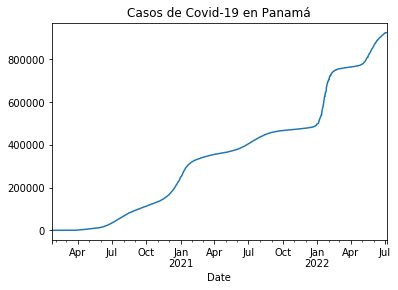

In [42]:
casos_pa = df_rt_pa.set_index('Date')['Cases']
casos_pa.plot(title="Casos de Covid-19 en Panamá")

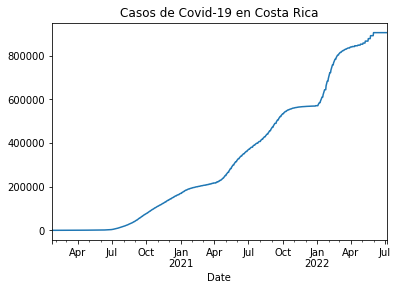

In [43]:
casos_cr = df_rt_cr.set_index('Date')['Cases']
casos_cr.plot(title="Casos de Covid-19 en Costa Rica")

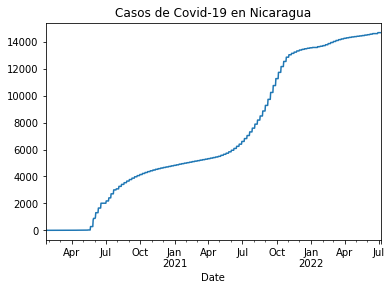

In [44]:
casos_ni = df_rt_ni.set_index('Date')['Cases']
casos_ni.plot(title="Casos de Covid-19 en Nicaragua")

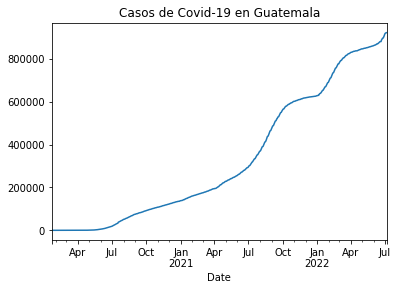

In [45]:
casos_gt = df_rt_gt.set_index('Date')['Cases']
casos_gt.plot(title="Casos de Covid-19 en Guatemala")

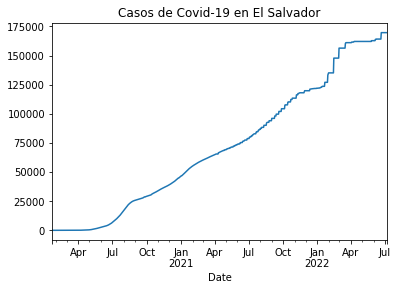

In [46]:
casos_sv = df_rt_sv.set_index('Date')['Cases']
casos_sv.plot(title="Casos de Covid-19 en El Salvador")

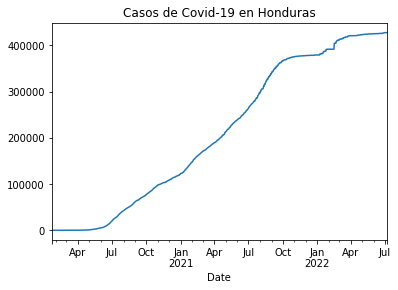

In [47]:
casos_hn = df_rt_hn.set_index('Date')['Cases']
casos_hn.plot(title="Casos de Covid-19 en Honduras")

Concateno todas las tablas previas y las nombro por cada uno de los países a los que pertenecen las columnas.

In [48]:
casos_pa_cr_ni_gt_sv_hn = pd.concat([casos_pa,casos_cr,casos_ni,casos_gt,casos_sv,casos_hn],axis=1)
casos_pa_cr_ni_gt_sv_hn.columns= ['Panamá','Costa Rica', 'Nicaragua', 'Guatemala', 'El Salvador', 'Honduras']
casos_pa_cr_ni_gt_sv_hn

,Panamá,Costa Rica,Nicaragua,Guatemala,El Salvador,Honduras
Date,,,,,,
2020-01-22 00:00:00+00:00,0,0,0,0,0,0
2020-01-23 00:00:00+00:00,0,0,0,0,0,0
2020-01-24 00:00:00+00:00,0,0,0,0,0,0
2020-01-25 00:00:00+00:00,0,0,0,0,0,0
2020-01-26 00:00:00+00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2022-07-02 00:00:00+00:00,922990,904934,14690,918797,169646,427718
2022-07-03 00:00:00+00:00,925254,904934,14690,920294,169646,427718
2022-07-04 00:00:00+00:00,925254,904934,14690,921146,169646,427718


Posteriormente *ploteo* para visualizar la gráfica comparativa.

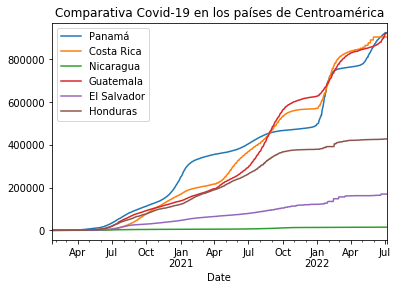

In [49]:
casos_pa_cr_ni_gt_sv_hn.plot(title="Comparativa Covid-19 en los países de Centroamérica")

Para finalizar, exporto la tabla en CSV y la gráfica en formato vectorial para *web* (SVG).

In [50]:
casos_pa_cr_ni_gt_sv_hn.to_csv('casos_pa_cr_ni_gt_sv_hn.csv')
%ls

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 0699-4041

 Directorio de C:\Users\RNASA\IriaSantos-web

06/07/2022  13:00    <DIR>          .
06/07/2022  13:00    <DIR>          ..
30/06/2022  19:23    <DIR>          .ipynb_checkpoints
17/06/2022  22:31             6.774 ad1.md
22/06/2022  01:20             4.455 ad2.md
28/06/2022  01:08            93.323 ad3.ipynb
28/06/2022  01:11            75.389 ad3.md
27/06/2022  00:56            19.134 ad3_2.ipynb
27/06/2022  01:00            12.909 ad3_2.md
06/07/2022  12:59           477.300 api-covid-pandas.ipynb
06/07/2022  12:52            60.070 api-covid-pandas.md
06/07/2022  13:00            56.543 casos_pa_cr_ni_gt_sv_hn.csv
06/07/2022  12:51            76.963 casos_pa_cr_ni_gt_sv_hn.svg
06/07/2022  12:52            13.901 output_22_0.png
06/07/2022  12:52            14.409 output_29_0.png
06/07/2022  12:52            13.425 output_31_0.png
06/07/2022  12:52            22.614 output_32_0.png
06/07/2022  12:52 

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: 0699-4041

 Directorio de C:\Users\RNASA\IriaSantos-web

06/07/2022  13:00    <DIR>          .
06/07/2022  13:00    <DIR>          ..
30/06/2022  19:23    <DIR>          .ipynb_checkpoints
17/06/2022  22:31             6.774 ad1.md
22/06/2022  01:20             4.455 ad2.md
28/06/2022  01:08            93.323 ad3.ipynb
28/06/2022  01:11            75.389 ad3.md
27/06/2022  00:56            19.134 ad3_2.ipynb
27/06/2022  01:00            12.909 ad3_2.md
06/07/2022  12:59           477.300 api-covid-pandas.ipynb
06/07/2022  12:52            60.070 api-covid-pandas.md
06/07/2022  13:00            56.543 casos_pa_cr_ni_gt_sv_hn.csv
06/07/2022  13:00            76.963 casos_pa_cr_ni_gt_sv_hn.svg
06/07/2022  12:52            13.901 output_22_0.png
06/07/2022  12:52            14.409 output_29_0.png
06/07/2022  12:52            13.425 output_31_0.png
06/07/2022  12:52            22.614 output_32_0.png
06/07/2022  12:52 

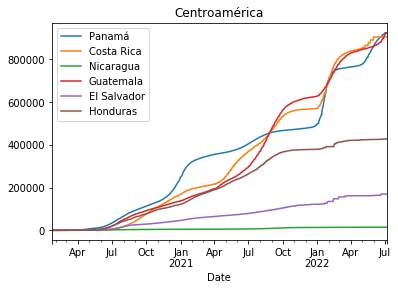

In [51]:
casos_pa_cr_ni_gt_sv_hn.plot(title="Centroamérica")
plt.savefig("casos_pa_cr_ni_gt_sv_hn.svg", format="svg")
%ls